# SCSP5013-Advanced Analytics(Alternative Assessment)

### TAN FEI ZHI B19EC0041

# Unsupervised Learning

#### Dataset used: Country-Data
#### Method used: K-means
#### Data source: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data 

# Topic Walkthrough

Since the pre-analytics data, data exploration and visualization and feature selection have been conducted and covered in project. Hence, this study will start from unsupervised learning. However, EDA will be conducted to clean the data before start with unsupervised learning.

#### Topic 1: Import Data
#### Topic 2: Exploratory Data Analytics(EDA)
#### Topic 3: Unsupervised Learning (K-means method)
#### Topic 4: Optimization (Stochastic Gradient Descent)
#### Topic 5: Conclusion

# Topic 1: Import Data

Import libraries and dataset

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Ignore warning
import warnings
warnings.filterwarnings('ignore')

#### For Visualization

In [2]:
from matplotlib.pyplot import xticks
%matplotlib inline

#### Read Data

In [3]:
path = "C:\\Users\\User\\Downloads\\Country-data.csv"

In [4]:
df = pd.read_csv(path)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Topic 2: Exploratory Data Analytics(EDA)

#### Converting exports, imports and health to actual values

Converting exports,imports and health spending from percentage to actual values of their GDP per capita. <br>
The percentage does not give a clear illustration of country.

In [5]:
df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

In [6]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### Drop Country Name

Dropping the country name sine it is not needed in K-means learninng.

In [7]:
df_dropped=df.drop("country",axis=1)

### Hopkins Statistics Test

Since the K-means algorithm is selected in this study. Hence, it is significant for us to know the cluster tendency of the dataset.<br>
The Hopkins statistic is a way of measuring the cluster tendency of a dataset.<br>
If the value is close to 1, it indicates the data is highly clustered. <br>
If the value is close to 0.5, it means that it is random.<br>
If the value is close to 0, it implies that the data is distributed uniformly.

#### Import the libraries

Import the required libraries for Hopkins Test

In [8]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [9]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

#### Hopkins Score

In [10]:
Hopkins_score=round(hopkins(df_dropped),2)

In [11]:
print("{} is a good Hopkins score for Clustering.".format(Hopkins_score))

0.97 is a good Hopkins score for Clustering.


### Feature scaling

The feature scaling is to handle highly varying magnitudes or values of data.<br>
There are a few methods for feature scaling. In this study, standard scaling is used to rescale the feature.<br>

#### Standard Scaling

Standardization is the distribution to have a mean of zero and a standard deviation of one by scaling each input variable separately by subtracting the mean (a process known as centering) and dividing by the standard deviation.

#### Import StandardScaler Library

In [12]:
from sklearn.preprocessing import StandardScaler

#### Standard Scaling Implemenation

In [13]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_dropped)

In [14]:
df_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

#### Assign the scaled data into df1

In [15]:
df1 = pd.DataFrame(df_scaled, columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# Topic 3: Unsupervised Learning(K-means)

In group project, my group applied PCA for unsupervised learning.<br>
In this study, the method used for unsupervised learning is **K-means**.<br>
Since K-means algorithm use cluster for learning, the number of cluster is an important thing that we have to choose wisely.<br><br>
Hence, there are two types of methods can be used to find the number of clusters(**Elbow Method&** and **Silhouette Analysis**).<br>
The **silhouette analysis** is applied in this study.

### Silhouette Analysis

The separation distance between the generated clusters can be investigated using silhouette analysis. <br>
The silhouette plot offers a visual approach to evaluate factors like the number of clusters by displaying a measure of how close each point in one cluster is to points in the neighbouring clusters.<br>
The score close to 1 : the data point is similar to other data points in the cluster. <br>
The score close to 0 : the data point is not similar to other data points in the cluster.

#### Import silhouette and K-means libraries

In [16]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

#### Calculate and Print Score for Silhouette Analysis 

In [17]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.42914711278370843
For n_clusters=5, the silhouette score is 0.4307751339677047
For n_clusters=6, the silhouette score is 0.2911660778262485
For n_clusters=7, the silhouette score is 0.31136565295133073
For n_clusters=8, the silhouette score is 0.3024368541743143


#### Plot Graph for Score of Silhouette Analysis 

Text(0.5, 1.0, 'silhouette for kmeans')

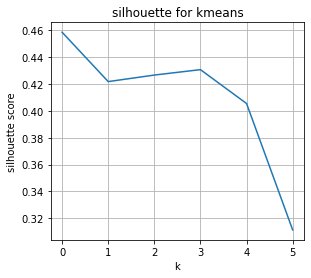

In [18]:
score = []
for n_clusters in range(2,8):
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(df1)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    score.append(silhouette_score(df_scaled,labels,metric='euclidean'))
    
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(score)
plt.grid(True)
plt.ylabel('silhouette score')
plt.xlabel('k')
plt.title('silhouette for kmeans')

Based on the results above, the ideal number of cluster is 3.

### K-means

K-means is a well-known unsupervised learning method.<br> 
**K** indicates that **the number of clustering and means** while **means** implies **the statistics mean a problem**.<br>
To calculate code-vectors, utilise K-means (the centroids of different clusters).<br>
It is grouping the data based on similar characteristics.

#### Fit K-means Model

In [19]:
cluster = KMeans(n_clusters=3, max_iter=150, random_state= 50)
cluster.fit(df1)

KMeans(max_iter=150, n_clusters=3, random_state=50)

#### Print Cluster Labels

Print out the labels for each countries data.

In [20]:
cluster.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

Based on the array above, it indicates that the data of all countries are assigned with label by following the clusters.<br>
For example, the data in array[0] is from cluster 2, the data in array[1] is from cluster 1 and onwards.

#### Assign Labels

In [21]:
df['Cluster_Id'] = cluster.labels_
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840,1


Based on the data above, we can observe that cluster_id column is added for each row.

#### Calculate The Number of Countries for Each Cluster

In [22]:
df.Cluster_Id.value_counts(ascending=True)

0    28
2    48
1    91
Name: Cluster_Id, dtype: int64

There are 28 countries from cluster 0, 48 countries from cluster 2 and the cluster occupied the most is 91.

### Graph Plotting

A few kinds of graphs are plotted to visualize how the most important factors that decides the development of the countries.<br>
The significant factors in this study are income, gdpp and child_mort.

#### Scatterplot

The scatterplot is used to show the relationship between two numerical data and the spread of data.

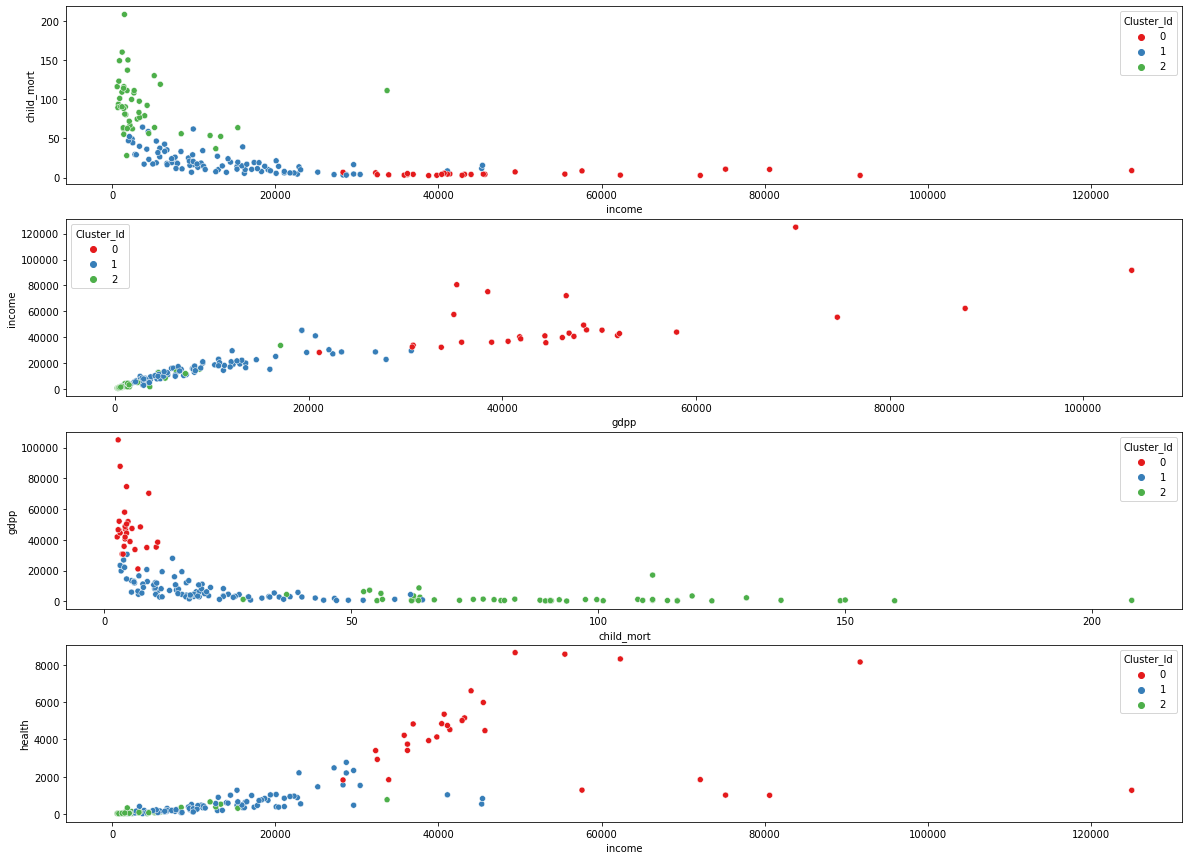

In [23]:
plt.figure(figsize = (20,15))
plt.subplot(4,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df,legend='full',palette="Set1")
plt.subplot(4,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df,legend='full',palette="Set1")
plt.subplot(4,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df,legend='full',palette="Set1")
plt.subplot(4,1,4)
sns.scatterplot(x = 'income', y = 'health',hue='Cluster_Id', data=df,legend='full',palette="Set1")
plt.show()

Based on the graph above, we can observe that the spread of cluster based on the attributes.

#### Violinplot

Violinplot is used to visualize the distribution of numerical data. It depicts summary statistics and the density of each variable.

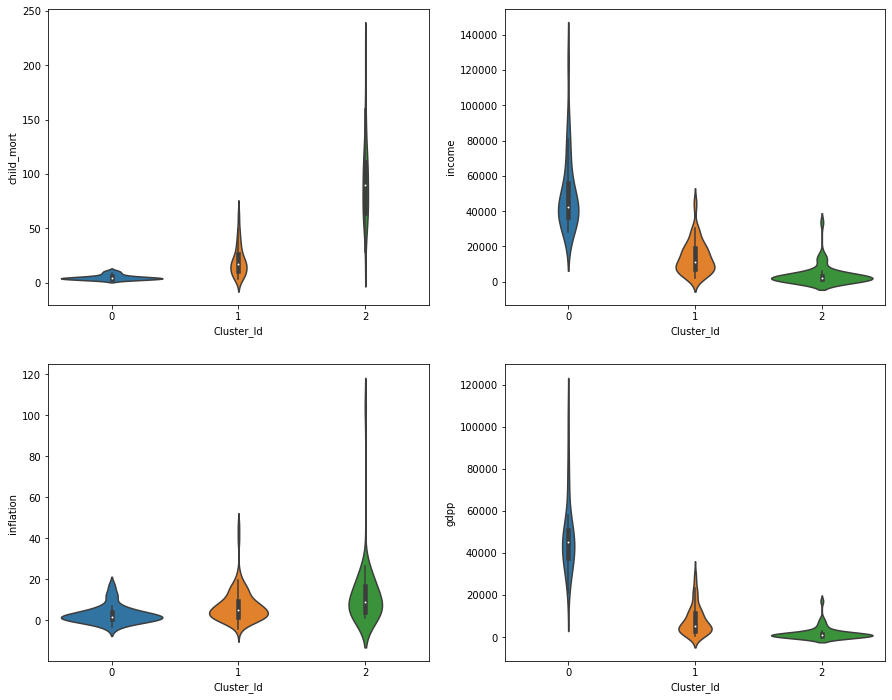

In [24]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_Id', y = 'child_mort', data = df,ax=axes[0][0])
sns.violinplot(x = 'Cluster_Id', y = 'income', data = df,ax=axes[0][1])
sns.violinplot(x = 'Cluster_Id', y = 'inflation', data=df,ax=axes[1][0])
sns.violinplot(x = 'Cluster_Id', y = 'gdpp', data=df,ax=axes[1][1])
plt.show()

Based on the violinplot above, we can know the density of each cluster based on the different variables.

#### Boxplot

A boxplot is a graph that gives you a good indication of how the values in the data are spread out. 

#### Boxplot on GDPP per Capita

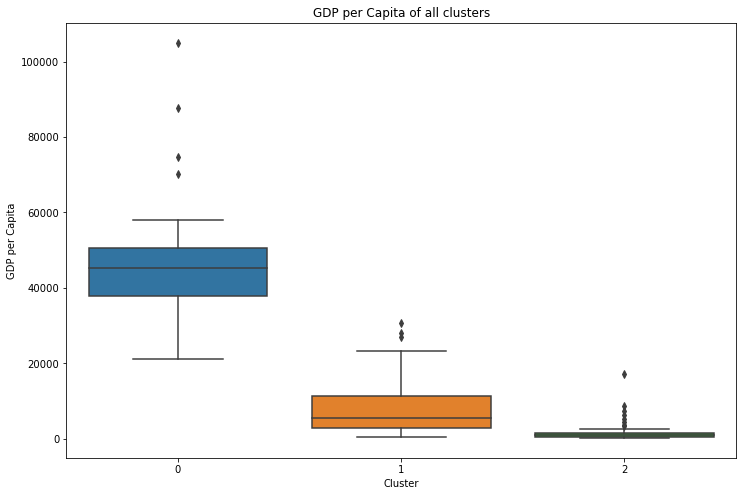

In [25]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='Cluster_Id',y='gdpp',data=df)
plt.xlabel('Cluster', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all clusters')
plt.show()

Based on the boxplot above, we get to know that the cluster 0 record highest GDP per Capita while the cluster 2 recorded the lowest.

#### Boxplot on Income

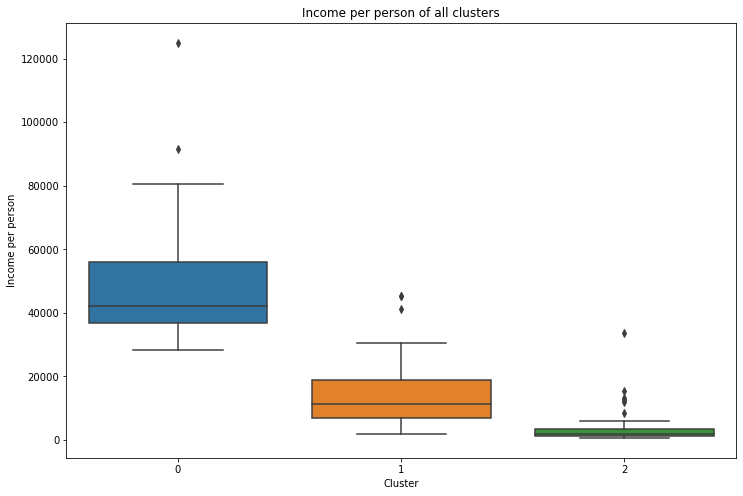

In [26]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='Cluster_Id',y='income',data=df)
plt.xlabel('Cluster', fontsize=10)
plt.ylabel('Income per person', fontsize=10)
plt.title('Income per person of all clusters')
plt.show()

Based on the boxplot above, we can conclude that the residents in country cluster 0 owned the highest income while the cluster 2 owned the least income.

#### Boxplot on Child_mort

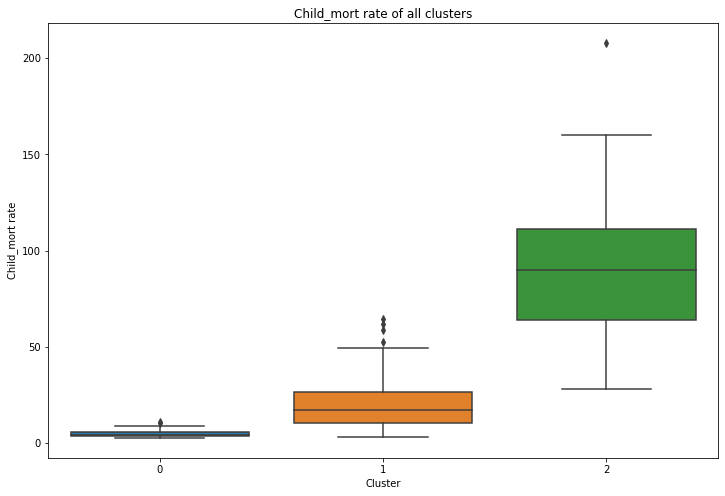

In [27]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='Cluster_Id',y='child_mort',data=df)
plt.xlabel('Cluster', fontsize=10)
plt.ylabel('Child_mort rate', fontsize=10)
plt.title('Child_mort rate of all clusters')
plt.show()

Based on the graph above, the cluster 2 has the most highest child_mort rate while the cluster 0 has the lowest child_mort rate.

#### Line Graph of Correlation

In [28]:
df.corr()['Cluster_Id'].sort_values()

life_expec   -0.836210
gdpp         -0.747701
income       -0.732458
health       -0.686934
imports      -0.501189
exports      -0.490890
inflation     0.283869
child_mort    0.783026
total_fer     0.785012
Cluster_Id    1.000000
Name: Cluster_Id, dtype: float64

<AxesSubplot:>

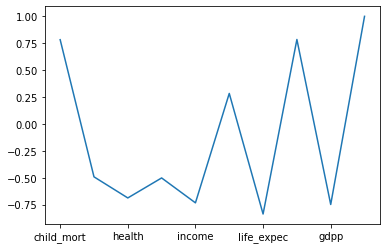

In [29]:
df.corr()['Cluster_Id'].plot()

Based on the line graph above, we get to know the correlation of the variables.

#### Calculate Mean Value of Data based on Cluster

In [30]:
df[['gdpp','income','child_mort','health','inflation','life_expec','total_fer','Cluster_Id']].groupby('Cluster_Id').mean()

,gdpp,income,child_mort,health,inflation,life_expec,total_fer
Cluster_Id,,,,,,,
0,48114.285714,50178.571429,5.046429,4327.163214,3.014679,80.514286,1.760714
1,7979.912088,13968.021978,20.357143,547.279455,7.070549,73.460440,2.235055
2,1909.208333,3897.354167,91.610417,114.821765,11.911146,59.239583,4.992083


#### Barplot

Plot the bar graph based on the variables

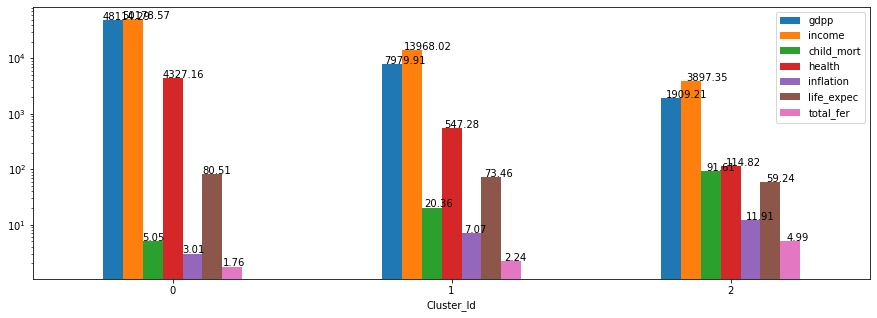

In [31]:
ax=df[['gdpp','income','child_mort','health','inflation','life_expec','total_fer','Cluster_Id']].
groupby('Cluster_Id').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.yscale('log')
plt.xticks(rotation=0)
plt.show()

#### Sort The Least Developed Country, Developing Country and Developed Country

Based on the graphs above, we can know that category of the countries.<br>
This step may help to observe clearly which countries(top 5) are under which kind of country and to know do they need help.<br>
0: Developed Countries<br>
1: Developing Countries <br>
2: The Least Developed Countries <br>


#### Developed Countries(Print first 5)

In [32]:
df[df['Cluster_Id']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
82,Kuwait,10.8,25679.5,1012.55,11704.0,75200,11.20,78.2,2.21,38500,0
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.70,77.1,1.84,35300,0
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.98,79.5,2.07,70300,0
157,United Arab Emirates,8.6,27195.0,1281.00,22260.0,57600,12.50,76.5,1.87,35000,0
159,United States,7.3,6001.6,8663.60,7647.2,49400,1.22,78.7,1.93,48400,0


#### Developing Countries (Print first 5)

In [33]:
df[df['Cluster_Id']==1].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720,7.04,66.8,2.41,988,1
154,Turkmenistan,62.0,3387.72000,111.0000,1975.800000,9940,2.31,67.9,2.83,4440,1
69,India,58.8,305.10000,54.6750,365.850000,4410,8.98,66.2,2.60,1350,1
146,Tajikistan,52.4,109.96200,44.1324,432.468000,2110,12.50,69.6,3.51,738,1
12,Bangladesh,49.4,121.28000,26.6816,165.244000,2440,7.14,70.4,2.33,758,1


#### The Least Developed Countries (Print first 5)

In [34]:
df[df['Cluster_Id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,2
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,2
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,2


#### Analyse the countries that might need aid based on socio economy factors (The least developed countries)

In [35]:
FinalListbyKMean=df[df['Cluster_Id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True])
FinalListbyKMean['country']
FinalListbyKMean.reset_index(drop=True).country[:]

0                        Haiti
1                 Sierra Leone
2                         Chad
3     Central African Republic
4                         Mali
5                      Nigeria
6                        Niger
7                       Angola
8             Congo, Dem. Rep.
9                 Burkina Faso
10               Guinea-Bissau
11                       Benin
12               Cote d'Ivoire
13           Equatorial Guinea
14                      Guinea
15                    Cameroon
16                  Mozambique
17                     Lesotho
18                  Mauritania
19                     Burundi
20                    Pakistan
21                      Malawi
22                        Togo
23                 Afghanistan
24                     Liberia
25                     Comoros
26                      Zambia
27                      Uganda
28                      Gambia
29                         Lao
30                       Sudan
31                       Ghana
32      

Based on the analyse above, we can know all the least developed countries from 0-47(total is 48 countries).

#### BarPlot on Child Mortality (Top 10 countries that needs assistance)

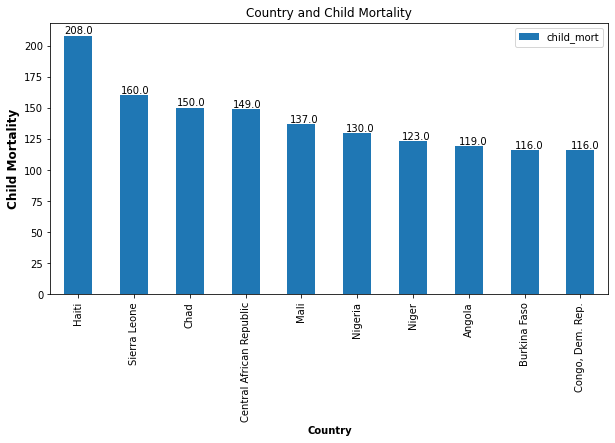

In [36]:
df_list_cm = pd.DataFrame(FinalListbyKMean.groupby(['country'])['child_mort'].mean().
                          sort_values(ascending = False)).head(10)
ax=df_list_cm.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

#### BarPlot on Per Capita Income (Top 10 countries that needs assistance)

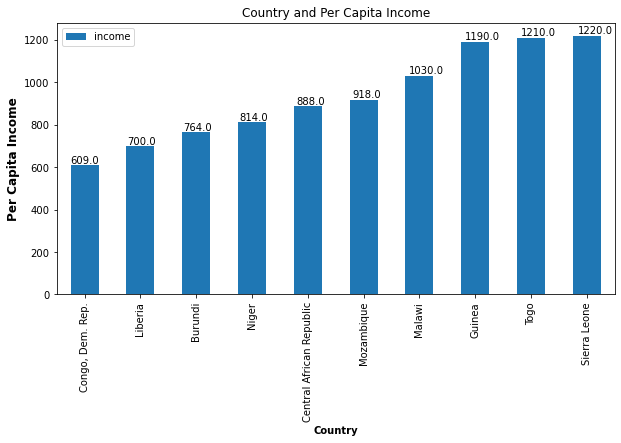

In [37]:
df_list_in = pd.DataFrame(FinalListbyKMean.groupby(['country'])['income'].mean().
                          sort_values(ascending = True)).head(10)
ax=df_list_in.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

#### BarPlot on GDP of countries (Top 10 countries that needs assistance)

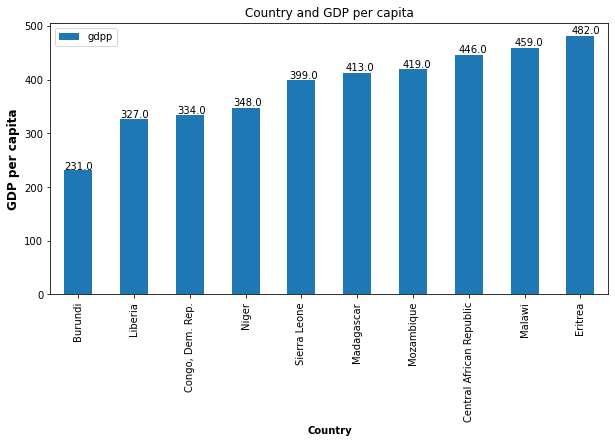

In [38]:
df_list_gdp =pd.DataFrame(FinalListbyKMean.groupby(['country'])['gdpp'].mean().
                          sort_values(ascending = True)).head(10)
ax=df_list_gdp.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

#### Visualize the gdpp of developed countries,developing countries and the least devloped countries

#### Classify to the correct country based on cluster and analysis above

In this section, the bar graph will be used to visualize the gdpp of developed countries, developing countries and the least developed countries.

In [39]:
Developed_country=df[df['Cluster_Id']==0]
Developing_country=df[df['Cluster_Id']==1]
Least_developed_country=df[df['Cluster_Id']==2]

#### Developed Country

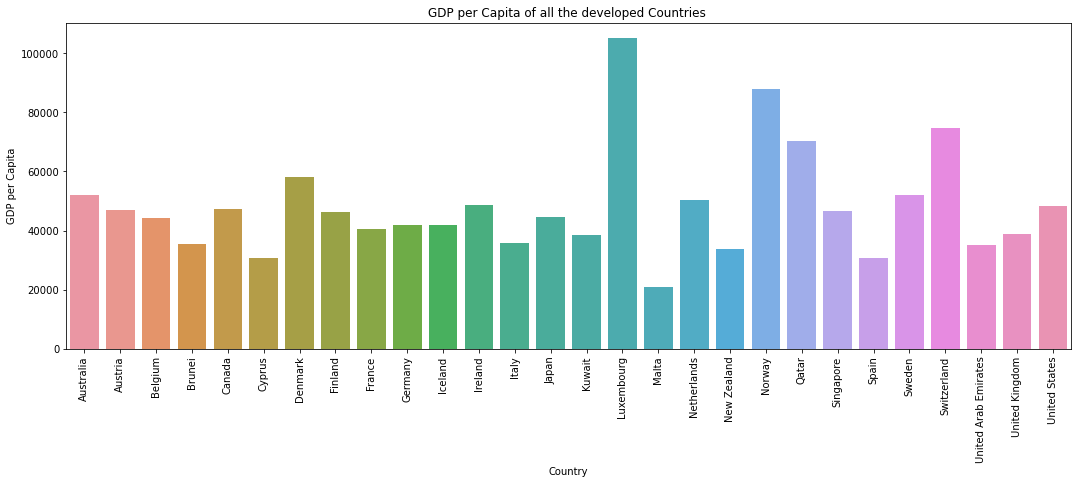

In [40]:
fig = plt.figure(figsize = (18,6))
s=sns.barplot(x='country',y='gdpp',data=Developed_country)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all the developed Countries ')
plt.show()

#### Developing Country

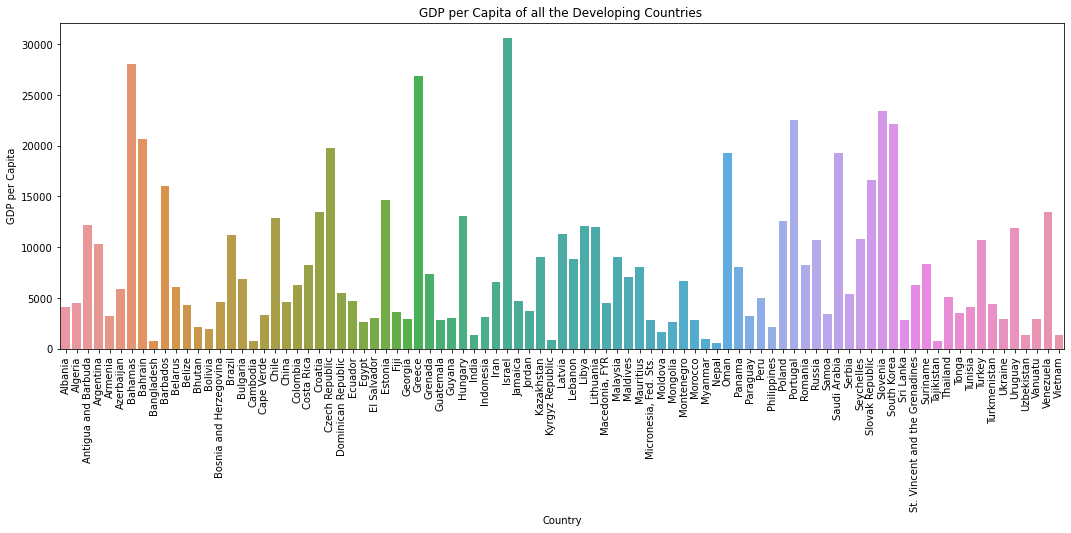

In [41]:
fig = plt.figure(figsize = (18,6))
s=sns.barplot(x='country',y='gdpp',data=Developing_country)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Developing Countries ')
plt.show()

#### The Least Developed Country

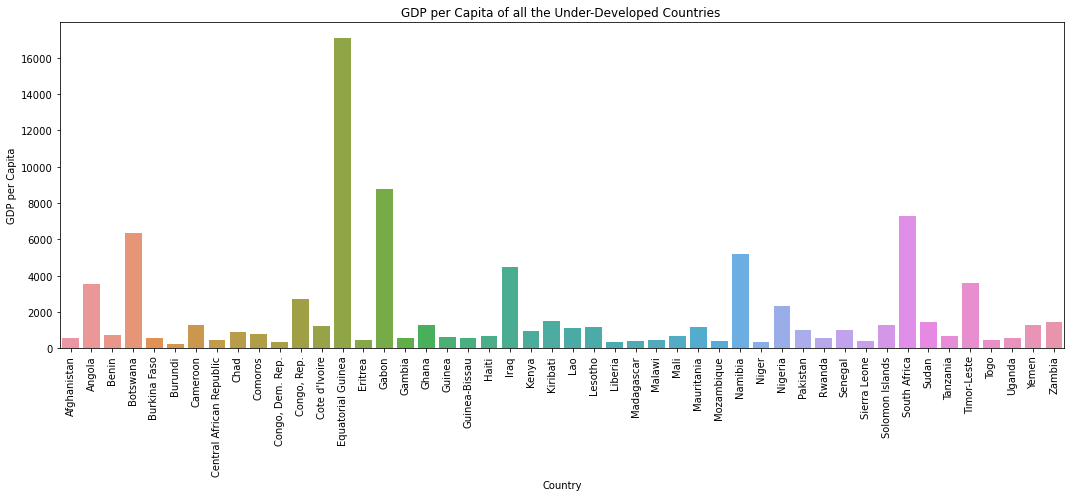

In [42]:
fig = plt.figure(figsize = (18,6))
s=sns.barplot(x='country',y='gdpp',data=Least_developed_country)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Under-Developed Countries ')
plt.show()

#### The Finalise List of Countries that Need Aid 

In [43]:
FinalListbyKMean.reset_index(drop=True).country[:10]

0                       Haiti
1                Sierra Leone
2                        Chad
3    Central African Republic
4                        Mali
5                     Nigeria
6                       Niger
7                      Angola
8            Congo, Dem. Rep.
9                Burkina Faso
Name: country, dtype: object

# Topic 4: Optimization(Stochastic Gradient Descent)

Optimization is the process where we train the model iteratively that results in a maximum and minimum function evaluation. It is one of the most important phenomena in Machine Learning to get better results.In a simple word, optimization is an effective approach to achieve a "best" solution, where a single objective is maximized or minimized.

### Stochastic Gradient Descent(SGD)

The optimization algorithm stochastic gradient descent is frequently used in machine learning applications to identify the model parameters that best match the expected and actual outputs.<br><br>
Stochastic Gradient Descent is that it does the calculations faster than gradient descent and batch gradient descent.<br>
It is easier to fit in the memory due to a single training example being processed by the network.<br>
For larger datasets, it can converge faster as it causes updates to the parameters more frequently.<br>

However, unlike batch gradient descent, stochastic gradient descent does not descend smoothly because of its inherent randomness. This implies that it will oscillate, and while it might generate useful parameters, they are rarely going to be ideal.

#### Import Libraries for SGD¶

In [44]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

#### Assigned X,y and thetas

Assigned Cluster_Id as y and other variables as X except from country name

In [50]:
X,y = df.drop('country',axis=1),df['Cluster_Id']

thetas = np.zeros(X.shape[1])

#### Cost Function

A cost function, often known as a loss function, is a simple function that figures out how much money a hypothesis loses.

In [51]:
def cost_function(X,Y,B):
    predictions = np.dot(X,B.T)
    
    cost = (1/len(Y)) * np.sum((predictions - Y) ** 2)
    return cost

In [52]:
cost_function(X,y,thetas)

1.694610778443114

#### Mean Squared Error

Mean Squared Error is a measure of how close a fitted line is to data points.

In [53]:
mean_squared_error(np.dot(X,thetas.T),y)

1.6946107784431137

#### Stochastic Gradient Descent(SGD) Implementation

Implementing SGD here.

#### Min-Max Scaling¶

Min-max scaling is to subtract the minimum value in the dataset with all the values and then divide this by the range of the dataset(maximum-minimum).

In [54]:
X_norm = (X - X.min()) / (X.max() - X.min())
X = X_norm

#### Learning Schedule

Setting the learning rate can be challenging since Stochastic Gradient Descent's inherent randomness prevents the algorithm from ever settling at a minimum.

In order to give the algorithm a better chance of finding the global minimum, one way is to set the learning rate to be initially big (so it can bypass local optima) and then gradually decline.

In [55]:
t0,t1 = 5,50 # hyperparams
def learning_schedule(t):
    return t0/(t+t1)

In [56]:
def stochastic_gradient_descent(X,y,theta,n_epochs=50):
    c_hist = [0] * n_epochs
    for epoch in range(n_epochs):
        for i in range(len(y)):
            rand_index = np.random.randint(len(y))
            ind_x = X[rand_index:rand_index+1]
            ind_y = y[rand_index:rand_index+1]

            gradients = 2 * ind_x.T.dot(ind_x.dot(theta) - ind_y)
            eta = learning_schedule(epoch * len(y) + i)
            theta = theta - eta * gradients
            c_hist[epoch] = cost_function(ind_x,ind_y,theta)
    return theta,c_hist

In [57]:
th_n,cost_history = stochastic_gradient_descent(X,y,thetas)

#### Evaluating the performance of SGD

In [58]:
mean_squared_error(np.dot(X,th_n.T),y)

0.006045579463786572

Based on the result above, the performance is quite good since the mean squared error reduced from 1.69 to 0.006.<br>
We can observe the improvement after SGD optimization.

#### Plot the graph

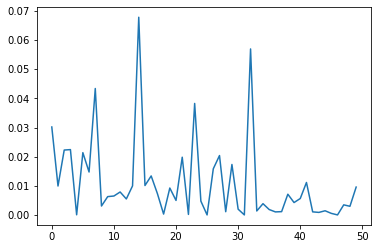

In [59]:
plt.plot(range(50),cost_history)
plt.show()

Based on the line graph above, we can see the cost function(loss) by the number of epochs.
The loss is gradually decreasing from epoch to epoch.
The result shown above is an ideal situation for the optimization.

# Topic 5: Conclusion

In conclusion, the study have covered on a few topics. Since the pre-analytics data has been covered in group project, this study only touched up a bit on EDA to adjust and rescale the data. 
After EDA, the unsupervised learning takes place. 
The unsupervised learning algorithm selected is K-means.
Since K-means algorithm use cluster for learning, the number of cluster is an important thing that we have to choose wisely.
Thus, silhouette analysis has been conducted to find the most ideal cluster number.
By applying silhouette analysis, the silhoutte score is calculated for each defined cluster.
Based on the scores n_from cluster 2 to 8, the results are around 0.2 to 0.4.
The line graph is plotted based on the score of silhoutte analysis, the visualization can help us to see clearly in order to decide the number of cluster.
The most ideal number of cluster is 3 in this study.

Next, the unsupervised learning takes place. K-means model is created to cluster the data.
The labels are assigned to each countries data based on the cluster.
In addition, there are a few kinds of graphs are plotted to visualize the results based on cluster.
Based on the graphs, we can know that the socio-economy for each cluster.
We can conclude that the countries from cluster 0 is developed country, cluster 1 is developing country and cluster 2 is the least developed country.
Finally, the finalise list of countries that need aid shows the top 10 countries that need aid. The top 10 least developed countries are Haiti, Sierra Leone, Chad, Central African Republic, Mali, Nigeria, Niger, Angola, Congo, Dem. Rep.and Burkina Faso.

Furthermore, the Stochastic Gradient Descent(SGD) is selected for optimization. 
Stochastic gradient descent is an optimization algorithm often used in machine learning applications to find the model parameters that correspond to the best fit between predicted and actual outputs. 
The cost function is used to find the loss. 
A cost function is an important parameter that determines how well a machine learning model performs for a given dataset. SGD will run from epoch to epoch and lastly the performance of SGD is evaluated by mean_sqaured_error. 
The performance is quite good since the mean squared error reduced from 1.69 to 0.006.
This situation indicates the improvement after SGD optimization. Also, the line graph is plotted to visualize the loss from epoch to epoch.

To sum up, K-means is a good algorithm for unsupervised learning by using clustering method. 
The results of clustering are visualized in many graphs. 
The visualization helps the readers to clearly understand the analysis of developed countries, developing countries and the least devloped countries.
K-means helps to finalise the countries need the urgent aids. 
Hence, the HELP may provide the immediate aids to those countries.
Lastly, the optimization using Stochastic Gradient Descent reduce the loss and improve the performance.
